In [1]:
import igraph
import numpy as np
import pandas as pd

# Data cleaning

In [2]:
df = pd.read_excel("支持信息.xls", 
                   sheet_name='Homo',
                   index_col=0)
df = df.fillna(0).astype(int)
df

,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,左内直肌,右内直肌,左睫状肌,右睫状肌,左瞳孔括约肌,右瞳孔括约肌,左眼上斜肌,右眼上斜肌,左眼外直肌,右眼外直肌
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
右瞳孔括约肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼外直肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Check names

In [3]:
# check names

col_names = list(df.columns)
row_names = list(df.index)
print("# colume names", len(col_names))
print("# row names", len(row_names))
print("names only existing in columes:", set(col_names)-set(row_names))
print("names only existing in rows:", set(row_names)-set(col_names))

names = set(col_names).intersection(row_names)
names = list(names)
print("# intersection names", len(names))

print(col_names==row_names)

# colume names 245
# row names 245
names only existing in columes: set()
names only existing in rows: set()
# intersection names 245
True


In [4]:
names

['右镫骨肌',
 '左杓状软骨',
 '左舌下神经核',
 '右上颌骨',
 '右咽鼓管咽肌',
 '左内直肌',
 '右鼻骨',
 '环状软骨',
 '右大脑皮层味觉区',
 '右口轮匝肌',
 '左睫状肌',
 '左咬肌',
 '右甲状舌骨肌',
 '右颊肌',
 '左茎突咽肌',
 '左鼻骨',
 '左滑车神经核',
 '左环甲肌',
 '左颏舌肌',
 '右三叉神经中脑核',
 '右舌、会厌乳头',
 '左翼外肌下头',
 '左三叉神经脑桥核',
 '右内直肌',
 '左疑核',
 '左帽状腱膜',
 '左孤束核',
 '下颌骨',
 '左腭帆提肌',
 '右睫状肌',
 '右瞳孔括约肌',
 '左颞肌',
 '右额肌',
 '右颏舌骨肌',
 '甲状软骨',
 '枕骨',
 '左镫骨肌',
 '右二腹肌后腹',
 '右颞肌',
 '右疑核',
 '右耳下肌',
 '左动眼神经核',
 '右眼上斜肌',
 '右翼外肌下头',
 '右咽下缩肌',
 '右杓状软骨',
 '左二腹肌前腹',
 '左皱眉肌',
 '左甲杓肌',
 '杓横肌',
 '右眼外直肌',
 '左C1、C2',
 '右副神经脊髓根',
 '左三叉神经半月神经节',
 '左提上睑肌',
 '右面神经膝',
 '右上神经节',
 '右副神经核',
 '右颏肌',
 '右下直肌',
 '椎骨',
 '左肩胛骨',
 '右上直肌',
 '右滑车神经核',
 '右腭咽肌',
 '左锤骨',
 '左环杓肌',
 '左舌骨舌肌',
 '右翼外肌上头',
 '左斜方肌',
 '左涡神经核',
 '右降眉间肌',
 '左降眉间肌',
 '左降眉肌',
 '左面神经核',
 '左茎突舌骨肌',
 '左胸骨甲状肌',
 '右侧左半视网膜',
 '左大脑皮层中央前回底部',
 '右颞顶肌',
 '左腭舌肌',
 '右丘脑外侧膝状体',
 '左上神经节',
 '右上丘',
 '右丘脑腹后内侧核',
 '额骨',
 '左下颌舌骨肌',
 '杓斜肌',
 '右砧骨',
 '右眼轮匝肌',
 '左下直肌',
 '左口轮匝肌',
 '左上颌骨',
 '左双极细胞',
 '右斜方肌',
 '左甲状舌骨肌',
 '右大脑皮层中央前回底部',
 '左二腹肌后腹',
 '右二腹肌前腹',
 '筛骨',
 '左侧左半视网膜',
 '

In [5]:
fil_df = df.loc[col_names, col_names]
fil_df

,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,左内直肌,右内直肌,左睫状肌,右睫状肌,左瞳孔括约肌,右瞳孔括约肌,左眼上斜肌,右眼上斜肌,左眼外直肌,右眼外直肌
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
右瞳孔括约肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼外直肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# save
fil_df.to_csv("filtered_data.csv")

## Check adjacent matrix

In [7]:
def check_sym(df: pd.DataFrame, r, c):
    if df.iloc[r, c] != df.iloc[c, r]:
        print(df.index[r], df.columns[c])

In [8]:
arr = fil_df.to_numpy()
print('max', arr.sum(1).max())
print('sum', arr.sum())
arr

max 36
sum 1340


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
arr.trace()

0

In [10]:
idx = np.where(arr!=arr.T)
idx

(array([], dtype=int64), array([], dtype=int64))

In [11]:
for i, j in zip(*idx):
    if i < j:
        check_sym(fil_df, i, j)

In [12]:
# save to csv
df2 = fil_df.copy()
for i, j in zip(*idx):
    df2.iloc[i, j] = 1
arr = df2.to_numpy()
print(arr.trace())
print(np.all(arr.T==arr))
print("max", np.max(arr.sum(1)))
print("sum", np.sum(arr))

0
True
max 36
sum 1340


In [13]:
df2.to_csv('filtered_data.csv')
del df2

# NIMS

In [14]:
df = pd.read_csv('filtered_data.csv', index_col=0)
print(len(df))
arr = df.to_numpy()
print('sum', arr.sum())
print('trace', arr.trace())
print('max', np.max(arr.sum(1)))
df

245
sum 1340
trace 0
max 36


,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,左内直肌,右内直肌,左睫状肌,右睫状肌,左瞳孔括约肌,右瞳孔括约肌,左眼上斜肌,右眼上斜肌,左眼外直肌,右眼外直肌
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
右瞳孔括约肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼外直肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# construct a graph from an adjacent matrix
adj_mat = df.to_numpy()
g = igraph.Graph.Adjacency(adj_mat, mode='undirected')
g.vs["name"] = df.columns
print(g)

IGRAPH UN-- 245 670 --
+ attr: name (v)
+ edges (vertex names):
左嗅觉细胞（嗅觉粘膜） -- 左嗅脑
右嗅觉细胞（嗅觉粘膜） -- 右嗅脑
        左嗅脑 -- 左嗅觉细胞（嗅觉粘膜）, 左大脑皮层听觉区
        右嗅脑 -- 右嗅觉细胞（嗅觉粘膜）, 右大脑皮层听觉区
    左侧左半视网膜 -- 右丘脑外侧膝状体
    左侧右半视网膜 -- 左丘脑外侧膝状体
    右侧左半视网膜 -- 右丘脑外侧膝状体
    右侧右半视网膜 -- 左丘脑外侧膝状体
   左丘脑外侧膝状体 -- 左侧右半视网膜, 右侧右半视网膜, 左上丘
   右丘脑外侧膝状体 -- 左侧左半视网膜, 右侧左半视网膜, 右上丘
        左上丘 -- 左丘脑外侧膝状体, 左大脑皮层视觉区
        右上丘 -- 右丘脑外侧膝状体, 右大脑皮层视觉区
   左大脑皮层视觉区 -- 左上丘, 左大脑皮层听觉区, 左大脑皮层中央前回底部, 左大脑皮层中央后回底部, 左大脑皮层味觉区, 左脑膜
   右大脑皮层视觉区 -- 右上丘, 右大脑皮层听觉区, 右大脑皮层中央前回底部, 右大脑皮层中央后回底部, 右大脑皮层味觉区, 右脑膜
   左大脑皮层听觉区 -- 左嗅脑, 左大脑皮层视觉区, 左大脑皮层中央前回底部, 左大脑皮层中央后回底部, 左大脑皮层味觉区, 左涡神经核,
右涡神经核, 左脑膜
   右大脑皮层听觉区 -- 右嗅脑, 右大脑皮层视觉区, 右大脑皮层中央前回底部, 右大脑皮层中央后回底部, 右大脑皮层味觉区, 左涡神经核,
右涡神经核, 右脑膜
左大脑皮层中央前回底部 -- 左大脑皮层视觉区, 左大脑皮层听觉区, 左大脑皮层中央后回底部, 左大脑皮层味觉区, 左滑车神经核, 右滑车神经核,
左三叉神经运动核, 右三叉神经运动核, 左面神经核, 右面神经核, 左展神经核, 右展神经核, 左疑核, 右疑核, 右迷走神经背核, 右舌下神经核,
左副神经核, 右副神经核, 左副神经脊髓根, 右副神经脊髓根, 右C1、C2, 左脑膜
右大脑皮层中央前回底部 -- 右大脑皮层视觉区, 右大脑皮层听觉区, 右大脑皮层中央后回底部, 右大脑皮层味觉区, 左滑车神经核, 右滑车神经核,
左三叉神经运动核, 右

In [16]:
for i in range(1000):
    idx = np.random.randint(0, len(df), 2)
    r_name, c_name = df.columns[idx[0]], df.columns[idx[1]]
    r, c = list(df.index).index(r_name), list(df.columns).index(c_name)
    ei = len(g.es.select(_within=[g.vs.find(name=r_name).index, g.vs.find(name=c_name).index]))
    if df.loc[r_name, c_name] != ei:
        print(r_name, c_name, df.loc[r_name, c_name], ei)
        print(arr[r, c], r, c)
        print(g.vs.find(name=r_name), g.vs.find(name=c_name))
        print()

In [17]:
len(g.es.select(_within=[g.vs.find(name=r_name), g.vs.find(name=c_name)]))

0

In [18]:
g.get_eid(59, 196, error=False)

-1

In [19]:
len(g.es.select(_within=[59, 196]))

0

In [20]:
g.vs.find(name='右舌下神经核')

igraph.Vertex(<igraph.Graph object at 0x7facfce66e50>, 59, {'name': '右舌下神经核'})

In [21]:
g.write("a.lgl")

/home/kent/miniconda3/envs/torch1.10/lib/python3.9/site-packages/igraph/__init__.py:2988: RuntimeWarning: weights attribute does not exists at src/io/lgl.c:249
  return writer(f, *args, **kwds)


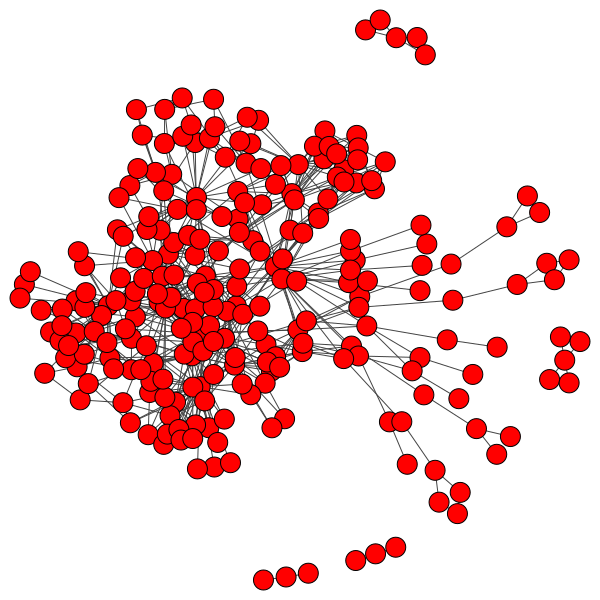

In [22]:
igraph.plot(g)

In [23]:
# connected components
np.unique(g.clusters().membership)

array([0, 1, 2, 3, 4])

In [24]:
cliques = np.array(g.clusters().membership)
for i in range(1, np.max(cliques)+1):
    a = np.where(cliques==i)[0]
    print(np.array(g.vs['name'])[a])

['左动眼神经核' '左提上睑肌' '左上直肌' '左下直肌' '左内直肌']
['右动眼神经核' '右提上睑肌' '右上直肌' '右下直肌' '右内直肌']
['左动眼神经副核' '左睫状肌' '左瞳孔括约肌']
['右动眼神经副核' '右睫状肌' '右瞳孔括约肌']


In [25]:
g.degree(g.vs.find('左内直肌'))

1

In [26]:
sub_g = g.subgraph(np.where(cliques==0)[0])
sub_g.get_edge_dataframe()

,source,target
edge ID,,
0,0,2
1,1,3
2,2,14
3,3,15
4,4,9
...,...,...
653,205,206
654,209,211
655,210,212


In [27]:
sub_g.write('a.lgl')

/home/kent/miniconda3/envs/torch1.10/lib/python3.9/site-packages/igraph/__init__.py:2988: RuntimeWarning: weights attribute does not exists at src/io/lgl.c:249
  return writer(f, *args, **kwds)
